In [1]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

In [3]:
grid_size = (10, 10)
rewards = np.zeros(grid_size)
rewards[0, 8] = -500
rewards[8, 6] = -100
rewards[5, 9] = 1000

In [4]:
restricted_area = {(1, 2), (2, 2), (3, 2), (4, 2), (3, 6), (4, 6), (5, 6), (6, 6), (5, 7), (6, 7)}
terminal_pos = {(5, 9)}
start_positions = [(0, i) for i in range(2)] + [(9, i) for i in range(2)]

num_states = np.prod(grid_size)
num_actions = 4
Q_matrix_old = np.random.rand(num_states, num_actions)
Q_matrix_current = Q_matrix_old.copy()

In [5]:
learning_rate = 0.1
discount = 0.8
epochs = 1000
convergence_threshold = 1e-4 
actions_made = []
error_rates = []
convergence_time = None

In [6]:
for epoch in range(epochs):
    start_pos = random.choice(start_positions)
    position = start_pos
    iteration_actions = [0] * 4

    while position not in terminal_pos:
        move_direction = random.choice(range(4))
        iteration_actions[move_direction] += 1
        current_state_q_index = position[0] * grid_size[1] + position[1]
        new_position = position

        if move_direction == 0:  
            new_position = (position[0] - 1, position[1])
        elif move_direction == 1: 
            new_position = (position[0], position[1] - 1)
        elif move_direction == 2: 
            new_position = (position[0] + 1, position[1])
        elif move_direction == 3:
            new_position = (position[0], position[1] + 1)

        if (
            new_position[0] < 0 or new_position[0] >= grid_size[0] or
            new_position[1] < 0 or new_position[1] >= grid_size[1] or
            new_position in restricted_area
        ):
            new_position = position

        old_Q = Q_matrix_old[current_state_q_index][move_direction]
        new_state_reward = rewards[new_position[0], new_position[1]]

        Q_matrix_current[current_state_q_index][move_direction] = \
        old_Q + learning_rate * (new_state_reward - 5 + discount * np.max(Q_matrix_old[new_position[0] * grid_size[1] + new_position[1]]) - old_Q)

        position = new_position

    actions_made.append([start_pos, iteration_actions])

    if epoch > 0:
        error_rate = np.mean(np.abs(Q_matrix_current - Q_matrix_old))
        error_rates.append(error_rate)

        if error_rate < convergence_threshold and convergence_time is None:
            convergence_time = epoch

    Q_matrix_old = np.copy(Q_matrix_current)

Optimal path from starting position 1: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 8), (4, 8), (4, 9), (5, 9)]
Optimal path from starting position 2: [(0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 8), (4, 8), (4, 9), (5, 9)]
Optimal path from starting position 3: [(9, 0), (9, 1), (8, 1), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (6, 9), (5, 9)]
Optimal path from starting position 4: [(9, 1), (8, 1), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (6, 9), (5, 9)]


C:\Users\sunrise\AppData\Local\Temp\ipykernel_4196\2956404040.py:55: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


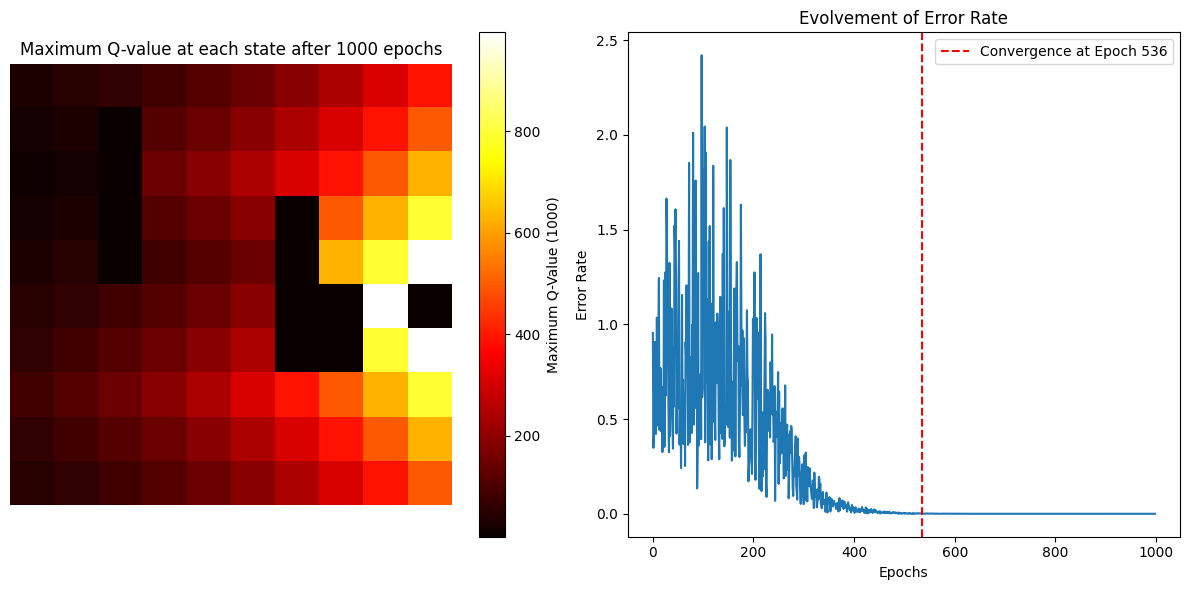

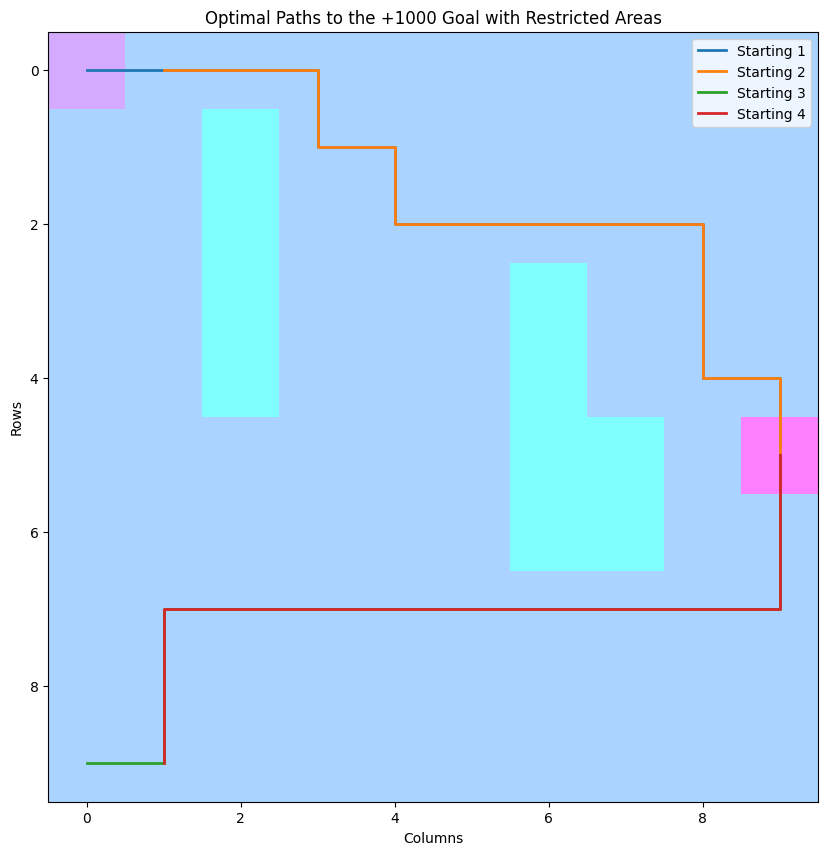

In [8]:
optimal_paths = []
for start_pos in start_positions:
    position = start_pos
    path = [position]

    while position not in terminal_pos:
        current_state_q_index = position[0] * grid_size[1] + position[1]
        action = np.argmax(Q_matrix_current[current_state_q_index])
        new_position = position
        if action == 0: 
            new_position = (position[0] - 1, position[1])
        elif action == 1: 
            new_position = (position[0], position[1] - 1)
        elif action == 2:  
            new_position = (position[0] + 1, position[1])
        elif action == 3:  
            new_position = (position[0], position[1] + 1)
        path.append(new_position)
        position = new_position

    optimal_paths.append(path)

for i, start_pos in enumerate(start_positions):
    print(f"Optimal path from starting position {i + 1}:", optimal_paths[i])

# Plot results
Q_max = np.zeros(grid_size)
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        Q_max[i, j] = np.max(Q_matrix_current[i * grid_size[1] + j])

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.title(f"Maximum Q-value at each state after {epochs} epochs")
im = plt.imshow(Q_max, cmap='hot', interpolation=None)
plt.colorbar(im, label='Maximum Q-Value (1000)')
plt.axis('off')

plt.subplot(122)
plt.plot(error_rates)
plt.title("Evolvement of Error Rate")
plt.xlabel("Epochs")
plt.ylabel("Error Rate")
plt.tight_layout()


if convergence_time is not None:
    plt.axvline(x=convergence_time, color='red', linestyle='--', label=f'Convergence at Epoch {convergence_time}')
    plt.legend()

#plt.subplot(133)
#plt.bar(["Episodes Needed"], [convergence_time])
#plt.title("Number of Episodes Needed for Convergence")
plt.tight_layout()
plt.show()

grid_with_restrictions = np.zeros(grid_size)
for position in restricted_area:
    grid_with_restrictions[position[0], position[1]] = -1

grid_with_restrictions[0, 0] = 1  
grid_with_restrictions[5, 9] = 2  

plt.figure(figsize=(10, 10))
cmap = plt.get_cmap("cool")
plt.imshow(grid_with_restrictions, cmap=cmap, alpha=0.5)

for i, start_pos in enumerate(start_positions):
    path = optimal_paths[i]
    x, y = zip(*path)
    plt.plot(y, x, label=f"Starting {i + 1}", linewidth=2)

plt.title("Optimal Paths to the +1000 Goal with Restricted Areas")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.legend()
plt.grid(visible=False)
plt.show()
